#Welcome

It is 5th April 2019 today and all you want to do today is kiting. 

What place on the earth will provide the best conditions ? 
- strong wind
- low cloud coverage - to avoid rain

With use of weather.json dataset we will find the answers.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('weather.json',lines=True) 

In [3]:
%%time
columns='start'
while len(columns)>0:
    columns = {c:[k for k in df[c][0].keys()] for c in df.columns if type(df[c][0]) is dict}
    for c in columns:
        for k in columns[c]:
            df[f'{c}_{k}'] = df[c].str[f'{k}']
    df.drop(columns = columns,inplace=True)


CPU times: user 2.46 s, sys: 71.1 ms, total: 2.53 s
Wall time: 2.55 s


In [4]:
df['time'] = pd.to_datetime(df['time'],unit='s')

#Date

By running .describe() function we can tell we are looking at weather data across the world during the time-period described below: 
- start 2019-04-05 11:05:04
- end   2019-04-05 11:08:26

In [5]:
df['time'].describe()

count                  209579
unique                    203
top       2019-04-05 11:05:28
freq                     1758
first     2019-04-05 11:05:04
last      2019-04-05 11:08:26
Name: time, dtype: object

#Temparature

In [6]:
#Convert Kelvin values into Celsius temperature
for c in [c for c in df.columns if 'temp' in c]:
    df[c] = df[c] - 273.15

In [7]:
df['lon'] = df['city_coord_lon'].round()
df['lat'] = df['city_coord_lat'].round()

To improve graph performance, we need to reduce points that are being plotted. 

By rounding latitude and longtitude values I will reduce 209579 data points into 9613. 

- 21x less scatter points
- preserving enough details 
- faster plotting times.

In [8]:
plot_df=df.groupby(['lon','lat']).mean()

In [9]:
df['clear_sky'] = (df['clouds_all'] - 100).abs()*3

plot_df=df.groupby(['lon','lat']).mean().rename(columns={'clear_sky':'Clear sky score','wind_speed':'Wind speed'})

In [10]:
df['wind_speed'].describe()

count    209579.000000
mean          3.502613
std           2.189748
min           0.020000
25%           1.790000
50%           3.100000
75%           4.600000
max          20.470000
Name: wind_speed, dtype: float64

According website ```thekiteplanet.com```, our range of wind speeds is within limits, as : ```"you can most likely operate your kite in gustier winds with a speed of 8-25 mph"```

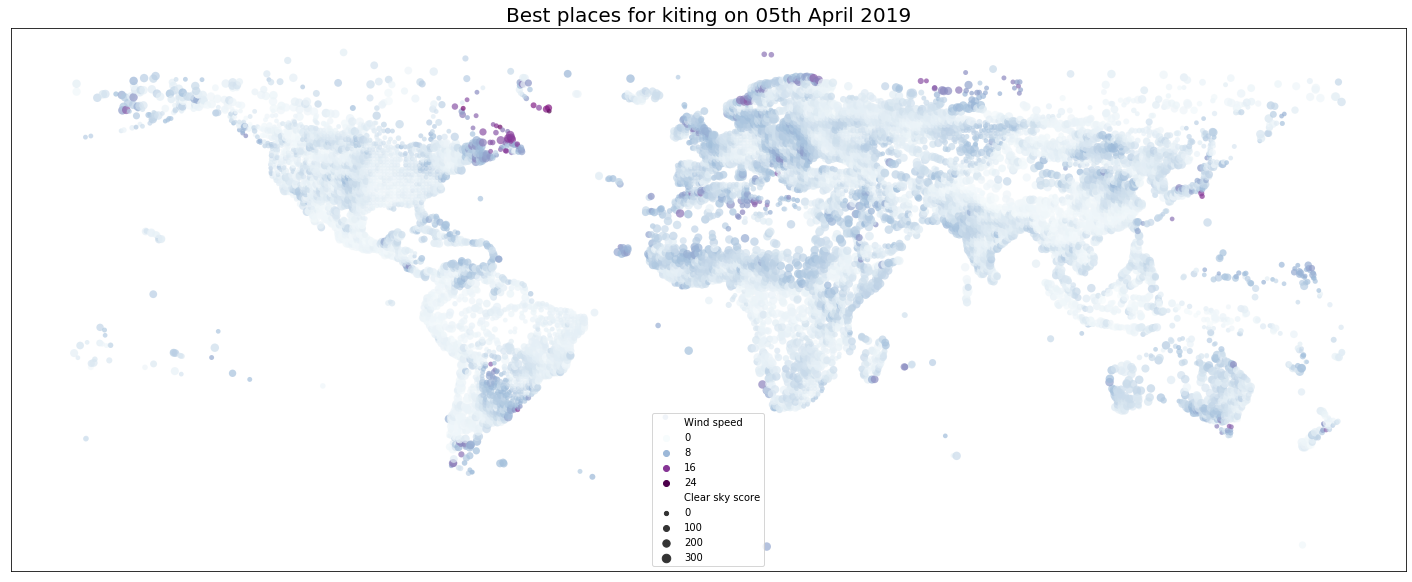

In [11]:
plt.figure(figsize=[25,10])



plt.gca().set_title('Best places for kiting on 05th April 2019',fontsize=20)
sns.scatterplot(data=plot_df,
                x='city_coord_lon',
                y='city_coord_lat',
                hue='Wind speed',
                alpha=0.7,
                palette='BuPu',
                size='Clear sky score',
                linewidth=0
                )
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()

In this notebook we have :
- loaded the json dataset into Pandas model and flattened it using our custom function
- converted epoch time into standard YYYY-MM-DD format
- converted Kelvins into Celsius 

... and visualised the best places for kiting on 5th April 2019.


To visualise two different variables I have used scatterplot
- darker color represents stronger winds
- larger dot represents clearer sky

While we might lose a bit of accuracy by removing edges, we will gain a nice watercolor effect in our visualisation. 
I have kept the amount of libraries to the bare minimum.





Thank you for your attention.
Hope you have enjoyed this notebook and visualisation :)
